In [1]:
import math
import random
import numpy as np
import numpy.linalg as nl
import scipy.linalg as sl
import matplotlib.pyplot as plt
import scipy.integrate as si
from scipy.integrate import tplquad,dblquad,quad
from scipy.stats import norm, uniform
from scipy.optimize import minimize
from scipy.linalg import fractional_matrix_power
from sklearn.linear_model import LinearRegression

In [3]:
def EI_calculate_m(A,Sigma):
    n=A.shape[0]
    return math.log(abs(sl.det(A))/(np.sqrt(sl.det(Sigma))*math.pow(2*np.pi*np.e,n/2)))

In [4]:
n=4
k=2
beta=0.8
sig=0.01
I_m=np.diag(np.ones(n))
CEs=[]
deltas=[]
deltas2=[]
sing_Ws=[]

for i in range(10000):

    random_matrix = np.random.rand(n, n)
    q, _ = np.linalg.qr(random_matrix)

    # 生成一个随机对角矩阵作为正定矩阵的特征值
    diagonal_values = np.random.uniform(0,1,n)  # 添加1确保所有特征值为正数

    diagonal_matrix = np.diag(diagonal_values)

    # 构造正定矩阵
    A = q @ diagonal_matrix @ q.T

    Lambda, P=np.linalg.eig(A)
    sorted_indices = np.argsort(Lambda)[::-1]  # 得到排序后的索引
    Lambda = Lambda[sorted_indices]
    P=P[:, sorted_indices]

    W=np.random.normal(0, 1, (k, n))
    W_pseudoinv=np.linalg.pinv(W)

    A_M=W@A@np.linalg.pinv(W)

    Sigma=np.diag([sig for i in range(n)])
    Sigma_M=W@Sigma@W.transpose()

    CE=EI_calculate_m(A_M,Sigma_M)/k-EI_calculate_m(A,Sigma)/n
    
    _,S,_=np.linalg.svd(W)

    CEs.append(CE)
    deltas.append(np.log(sl.det(A_M)/sl.det(A)))
    deltas2.append(np.log(sl.det(Sigma)/sl.det(Sigma_M)))
    sing_Ws.append(np.log((S**2).mean()))

Text(0,0.5,'$\\Delta\\mathcal{J}$')

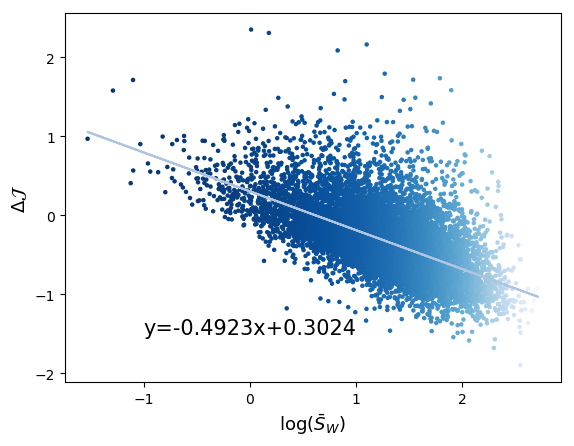

In [5]:
regressor3 = LinearRegression()

regressor3.fit(np.array(sing_Ws).reshape(len(sing_Ws),1), np.array(CEs))
cmap = plt.get_cmap('Blues_r')
# 根据纵坐标设置颜色
colors = cmap(np.exp(np.array(sing_Ws))/(np.exp(np.array(sing_Ws)).max()))
plt.scatter(sing_Ws,CEs,s=5,c=colors)
plt.plot(np.array(sing_Ws).reshape(len(sing_Ws),1), regressor3.predict(np.array(sing_Ws).reshape(len(sing_Ws),1)),color='lightsteelblue')
plt.text(-1,-1.5,'y=%.4fx+%.4f'%(regressor3.coef_[0], regressor3.intercept_),fontsize=15)
plt.xlabel('$\log(\\bar{S}_{W})$',fontsize=13)
plt.ylabel('$\Delta\mathcal{J}$',fontsize=13)

In [6]:
n=4
k=2

Ls=[]
mds=[]
for i in range(10000):
    dets=[]
    Ws=[]

    random_matrix = np.random.rand(n, n)
    q, _ = np.linalg.qr(random_matrix)

    # 生成一个随机对角矩阵作为正定矩阵的特征值
    diagonal_values = np.random.rand(n)  # 添加1确保所有特征值为正数

    diagonal_matrix = np.diag(diagonal_values)

    # 构造正定矩阵
    A = q @ diagonal_matrix @ q.T

    Lambda, P=np.linalg.eig(A)
    sorted_indices = np.argsort(Lambda)[::-1]  # 得到排序后的索引
    Lambda = Lambda[sorted_indices]
    P=P[:, sorted_indices]

    for i in range(100):

        W=np.random.normal(0, 1, (k, n))
        W_pseudoinv=np.linalg.pinv(W)
        A_hat=W@A@W_pseudoinv 

        dets.append(sl.det(A_hat))
        Ws.append(W)
    
    Ls.append(Lambda[0]*Lambda[1])
    mds.append(max(dets))

(-0.01, 1.02)

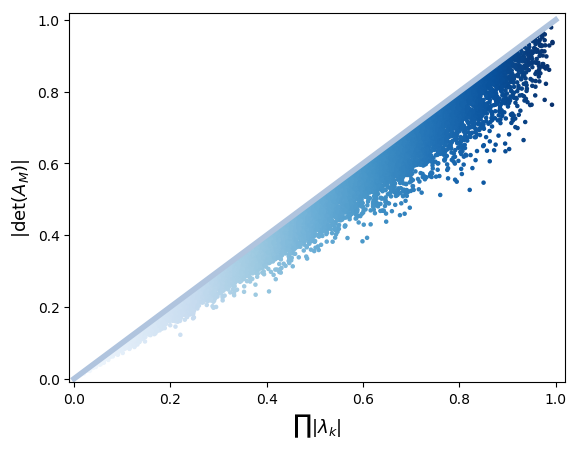

In [7]:
cmap = plt.get_cmap('Blues')

# 根据纵坐标设置颜色
colors = cmap(np.array(Ls)/1)
plt.scatter(Ls,mds,s=5,color=colors)
plt.plot(range(2),range(2),color='lightsteelblue',linewidth=4)
plt.xlabel('$\prod |\lambda_k|$',fontsize=13)
plt.ylabel('$|\det(A_M)|$',fontsize=13)
plt.xlim(-0.01,1.02)
plt.ylim(-0.01,1.02)

(-0.15, 3.8)

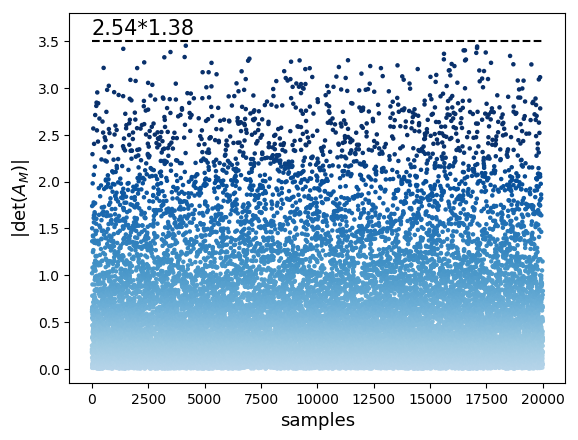

In [8]:
n=4
k=2
dets=[]
Ws=[]

positive_eigenvalues = np.array([ 2.53736349,  1.37893419, -0.48994064,  0.11496667])  # 生成5个范围在(1, 2)之间的正实数

# 生成对角矩阵，将特征值填充在对角线上
diagonal_matrix = np.diag(positive_eigenvalues)

# 生成一个随机的正交矩阵，这将确保生成的矩阵是非对称的
orthogonal_matrix = np.linalg.qr(np.random.rand(4, 4))[0]

# 通过相似变换得到非对称矩阵
asymmetric_matrix = np.dot(np.dot(np.linalg.inv(orthogonal_matrix), diagonal_matrix), orthogonal_matrix)

A=asymmetric_matrix

A=asymmetric_matrix

Lambda, P=np.linalg.eig(A)
sorted_indices = np.argsort(abs(Lambda))[::-1]  # 得到排序后的索引
Lambda = Lambda[sorted_indices]
P=P[:, sorted_indices]

for i in range(20000):

    W=np.random.normal(0, 1, (k, n))
    W_pseudoinv=np.linalg.pinv(W)
    A_hat=W@A@W_pseudoinv 
    
    dets.append(abs(sl.det(A_hat)))
    Ws.append(W)
cmap = plt.get_cmap('Blues')

# 根据纵坐标设置颜色
colors = cmap(np.array(dets)/np.array(dets).max()+0.3)
plt.scatter(range(20000),dets,s=5,c=colors)
plt.hlines(abs(Lambda[1]*Lambda[0]),0,20000,linestyles='--')
#plt.hlines(abs(Lambda[3]*Lambda[2]),0,20000,linestyles='--')
plt.text(1.0,abs(Lambda[1]*Lambda[0])+0.07,'%.2f*%.2f'%(Lambda[0],Lambda[1]),fontsize=15)
plt.xlabel('samples',fontsize=13)
plt.ylabel('|det($A_M$)|',fontsize=13)
plt.ylim(-0.15,3.8)
#plt.text(1.0,2.65,'sup',fontsize=15)
#plt.text(1.0,0.25,'inf',fontsize=15)

In [10]:
n=4
k=2
Ls=[]
mds=[]
index=[]
for i in range(10000):
    samples=100
    random_matrix = np.random.rand(n, n)
    q, _ = np.linalg.qr(random_matrix)

    # 生成一个随机对角矩阵作为正定矩阵的特征值
    diagonal_values = np.random.rand(n)  # 添加1确保所有特征值为正数

    diagonal_matrix = np.diag(diagonal_values)

    # 构造正定矩阵
    A = q @ diagonal_matrix @ q.T

    random_matrix = np.random.rand(n, n)
    q, _ = np.linalg.qr(random_matrix)

    # 生成一个随机对角矩阵作为正定矩阵的特征值
    diagonal_values = np.random.rand(n)  # 添加1确保所有特征值为正数

    diagonal_matrix = np.diag(diagonal_values)

    # 构造正定矩阵
    Sigma = q @ diagonal_matrix @ q.T

    Lambda, P=np.linalg.eig(A)
    sorted_indices = np.argsort(Lambda)[::-1]  # 得到排序后的索引
    Lambda = Lambda[sorted_indices]
    P=P[:, sorted_indices]

    Kappa, Q=np.linalg.eig(Sigma)
    sorted_indices_sigma = np.argsort(Kappa)[::-1]  # 得到排序后的索引
    Kappa = Kappa[sorted_indices_sigma]
    Q=Q[:, sorted_indices_sigma]

    dets=[]

    for i in range(samples):
        random_matrix_M = np.random.rand(k, k)
        random_matrix_M2 = np.random.rand(n, n)
        P_W, _ = np.linalg.qr(random_matrix_M)
        Q_W, _ = np.linalg.qr(random_matrix_M2)
        O=np.zeros((k,n-k))
        W_tide=np.hstack((P_W,O))
        W=W_tide@Q_W

        det=np.linalg.det(W@A@W.transpose())/(np.linalg.det((W@Sigma@W.transpose()))**(1/2))
        dets.append(det)

    Sigma_12=Q@np.diag(Kappa**(1/2))@np.linalg.inv(Q)

    L,_=np.linalg.eig(np.linalg.inv(Sigma_12)@A)
    sorted_indices = np.argsort(L)[::-1]  # 得到排序后的索引
    L = L[sorted_indices]
    index.append(L[0]*L[1]-max(dets))
    Ls.append(L[0]*L[1])
    mds.append(max(dets))

(-1, 30)

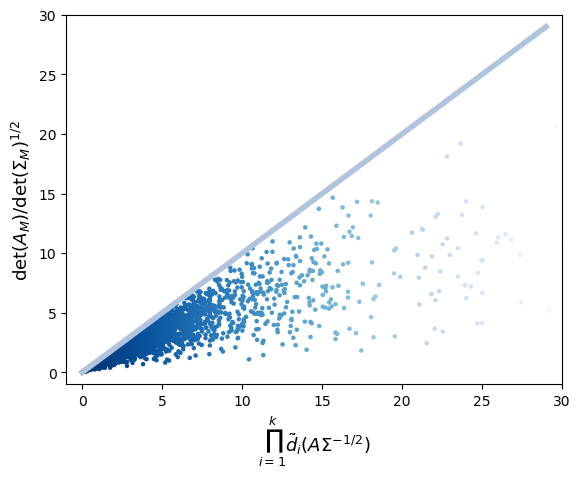

In [11]:
cmap = plt.get_cmap('Blues_r')

# 根据纵坐标设置颜色
colors = cmap(np.array(Ls)/30)
plt.scatter(Ls,mds,s=5,color=colors)
plt.plot(range(30),range(30),color='lightsteelblue',linewidth=4)
plt.xlabel('$\prod_{i=1}^k \\tilde{d}_i(A\Sigma^{-1/2})$',fontsize=13)
plt.ylabel('$\det(A_M)/\det(\Sigma_M)^{1/2}$',fontsize=13)
plt.xlim(-1,30)
plt.ylim(-1,30)

In [12]:
n=4
k=2

sups=[]
infs=[]
dets2=[]
for i in range(10000):
    random_matrix = np.random.rand(n, n)
    q, _ = np.linalg.qr(random_matrix)

    # 生成一个随机对角矩阵作为正定矩阵的特征值
    diagonal_values = np.random.rand(n)  # 添加1确保所有特征值为正数

    diagonal_matrix = np.diag(diagonal_values)

    # 构造正定矩阵
    A = q @ diagonal_matrix @ q.T

    random_matrix = np.random.rand(n, n)
    q, _ = np.linalg.qr(random_matrix)

    # 生成一个随机对角矩阵作为正定矩阵的特征值
    diagonal_values = np.random.rand(n)  # 添加1确保所有特征值为正数

    diagonal_matrix = np.diag(diagonal_values)

    # 构造正定矩阵
    Sigma = q @ diagonal_matrix @ q.T
    Sigma12 = q @ np.diag(diagonal_values**(1/2)) @ q.T

    Kappa, Q=np.linalg.eig(Sigma)
    sorted_indices_sigma = np.argsort(Kappa)[::-1]  # 得到排序后的索引
    Kappa = Kappa[sorted_indices_sigma]
    Q=Q[:, sorted_indices_sigma]

    W=np.random.normal(0, 1, (k, n))
    W_pseudoinv=np.linalg.pinv(W)

    _,S,_=np.linalg.svd(W)
    sorted_indices_s = np.argsort(S)[::-1]

    _,Sws,_=np.linalg.svd(W@Sigma12)

    sup=S*Kappa[:len(S)]**(1/2)
    inf=S*Kappa[len(S):]**(1/2)

    sups.append(np.prod(sup))
    infs.append(np.prod(inf))
    dets2.append(np.prod(Sws))

In [13]:
cmap1 = plt.get_cmap('Blues_r')
cmap2 = plt.get_cmap('Reds_r')
# 根据纵坐标设置颜色
colors1 = cmap1((sups-dets2)/(sups-dets2).max())
colors2 = cmap2((infs-dets2)/(infs-dets2).min())
plt.scatter(range(10000),sups-dets2,color=colors1,s=2,label='$\left(\prod s_{W,i}\kappa^{1/2}_{\Sigma,i}\\right)^\\frac{1}{k}-\det(W\Sigma W^T)^\\frac{1}{2k}$')
plt.scatter(range(10000),infs-dets2,color=colors2,s=2,label='$\left(\prod s_{W,i}\kappa^{1/2}_{\Sigma,n-i+1}\\right)^\\frac{1}{k}-\det(W\Sigma W^T)^\\frac{1}{2k}$')
plt.legend(fontsize=13)
plt.xlabel('samples',fontsize=13)
plt.ylabel('values',fontsize=13)

TypeError: unsupported operand type(s) for -: 'list' and 'list'